**Problem Statement** 

You are given a dataset containing policy information of motor insurance customers and the total claims they have filed with an insurance company. **The goal of this case study is to work towards building a model to predict the total number of claims a customer is going to file with the company.** 

**Objectives and Expected Output:**
1.	Build a model, using **one or more techniques other than a GLM, to predict the frequency of claims (claim_count per time of policy)** a customer’s going to make with the company.
2.	In this case study, we are interested in all the **steps involved in the model building process. Particularly data clean up, engineering new features, modelling and evaluation. Log and report all the key decisions made along the process.**
3.	Present your findings in a format you find most appropriate—Jupytr notebook, RMarkdown, PowerPoint, etc. **The expectation is this can be used to communicate to a non-technical business audience. In the interview, you will be asked about your modelling decisions and key findings**
4.	Email the Presentation & all your source code.

The expectation is to spend ~6 hours completing this case study, but you won’t be held or evaluated based on time spent (either less or more).

Data file (casestudy_data.csv) is provided as a separate file. Description of data fields is given below. 

**DATA DESCRIPTION:**
-	**policy_desc:** Policy Identifier; Primary Key which is unique for every policy 
-	**claim_count:** Total Claims (This is the response you should predicting); Numeric Variable 
-	**cat_areacode:** Area Code; Categorical Variable 
-	**num_vehicleAge:** Age of the vehicle; Numeric Variable 
-	**num_noClaimDiscountPercent:** Percentage of discount applied to policy premium based on claim history. If value is greater than 100 then policy premium was increased, if it’s less than 100 a discount was applied. A value of 100 means the premium remain unchanged; Numerical Variable 
-	**cat_carBrand:** Insured Vehicle Brand; Categorical Variable
-	**num_populationDensitykmsq:** Population density of the city the policy holder lives in; Numerical Variable
-	**cat_Region;** Region of the country the policy holder lives in; Categorical Variable
-	**ord_vehicleHP:** Vehicle Horsepower; This feature is anonymised but maintains the same ordinality; Ordinal Variable
-	**num_exposure:** Exposure time of policy. Time period within which the claims were made; Numerical Variable
-	**cat_fuelType:** Insured Vehicle Fuel Type; Categorical Variable
-	**num_driverAge:** Age of the Policy Holder; Numerical Variable

In [94]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt
import scikitplot as skplt

%matplotlib inline

ModuleNotFoundError: No module named 'lightgbm'

In [78]:
data_ = pd.read_csv('/Users/aaman10/Downloads/casestudy_data.zip')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [86]:
data_.dtypes

policy_desc                    int64
claim_count                    int64
cat_areacode                  object
num_vehicleAge                 int64
num_noClaimDiscountPercent     int64
cat_carBrand                  object
num_populationDensitykmsq      int64
cat_Region                    object
ord_vehicleHP                  int64
num_exposure                  object
cat_fuelType                  object
num_driverAge                  int64
dtype: object

In [80]:
data_["num_driverAge"] = data_["num_driverAge"].replace(r'^\s*$', np.nan, regex=True)

In [81]:
data_ = data_.dropna()

In [84]:
data_["num_driverAge"] = data_["num_driverAge"].astype({'num_driverAge':'int64'})

In [3]:
data_.head()

,policy_desc,claim_count,cat_areacode,num_vehicleAge,num_noClaimDiscountPercent,cat_carBrand,num_populationDensitykmsq,cat_Region,ord_vehicleHP,num_exposure,cat_fuelType,num_driverAge
0,1,1,D,0,50,B12,1217,R82,5,0.1,Regular,55
1,3,1,D,0,50,B12,1217,R82,5,0.77,Regular,55
2,5,1,B,2,50,B12,54,R22,6,0.75,Diesel,52
3,10,1,B,0,50,B12,76,R72,7,0.09,Diesel,46
4,11,1,B,0,50,B12,76,R72,7,0.84,Diesel,46


In [4]:
# profile = ProfileReport(data_, title="Pandas Profiling Report", explorative=True)

In [5]:
# profile.to_file("Insurance.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

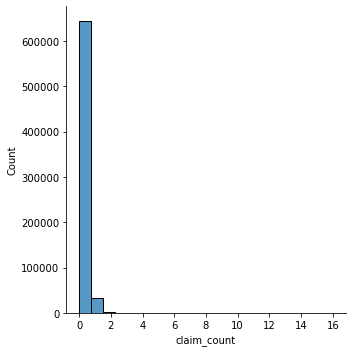

In [31]:
sns.displot(data_[''])

In [22]:
print("Skewness: %f" % data_['claim_count'].skew())
print("Kurtosis: %f" % data_['claim_count'].kurt())

Skewness: 5.599613
Kurtosis: 76.841880


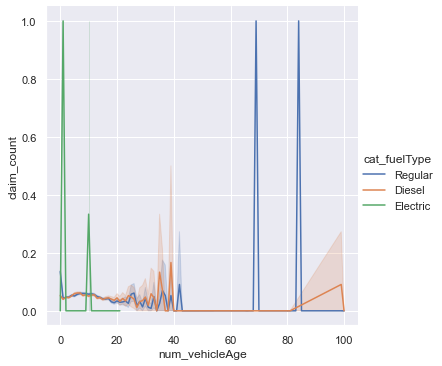

In [43]:
sns.relplot(data=data_, y="claim_count", x="num_vehicleAge", hue= "cat_fuelType", kind="line")

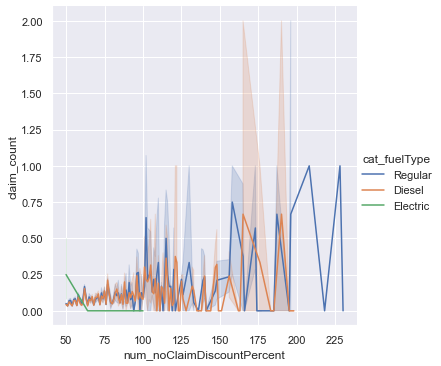

In [44]:
sns.relplot(data=data_, y="claim_count", x="num_noClaimDiscountPercent", hue= "cat_fuelType", kind="line")

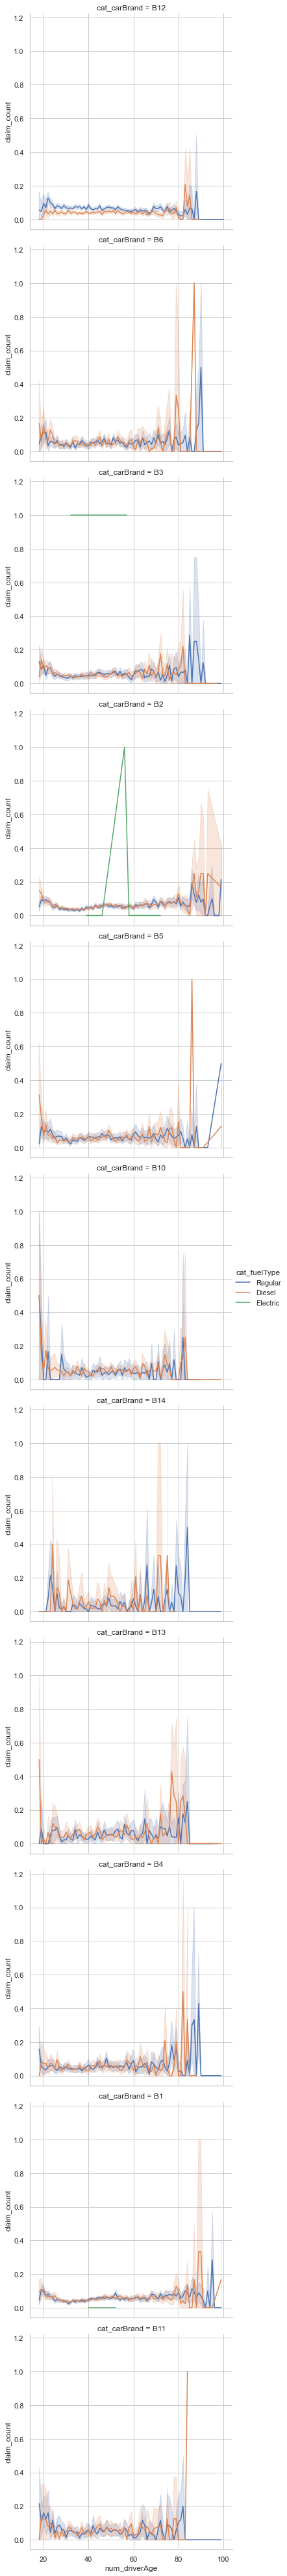

In [93]:
sns.relplot(data=data_, y="claim_count", x="num_driverAge", hue= "cat_fuelType", row="cat_carBrand", kind="line")

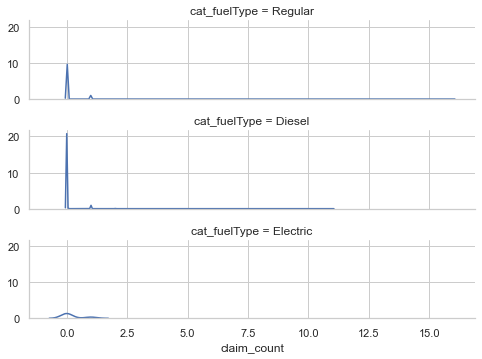

In [91]:
sns.set_style("whitegrid")
ft_ = data_.cat_fuelType.value_counts().index
g = sns.FacetGrid(data_, row="cat_fuelType", row_order=ft_,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "claim_count")